# Kaggle Forest Cover Type Prediction Competition

### Imports

In [43]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# Matplotlib visualization
import matplotlib.pyplot as plt
# Seaborn for visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import ExtraTreesClassifier

## Data Cleaning and Formatting
### Load in the Data and Examine

In [17]:
# Read in data into a dataframe 
train=pd.read_csv("./forest-cover-type-prediction/train.csv")
# Display top of dataframe
train.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [18]:
train.shape

(15120, 56)

In [19]:
train.set_index("Id",inplace=True)

## Data Exploration


In [20]:
print("Total number of records: {}".format(train.shape[0]))
print("Total number of null: {}".format(train.isnull().sum().sum()))

Total number of records: 15120
Total number of null: 0


### Class Distribution in Training Data

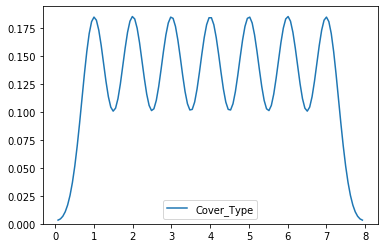

In [6]:
sns.kdeplot(train.Cover_Type)

### Calculated Statistics Numeric features

In [9]:
train.iloc[:,0:11].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,0.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E4EF450>,
      dtype=object)

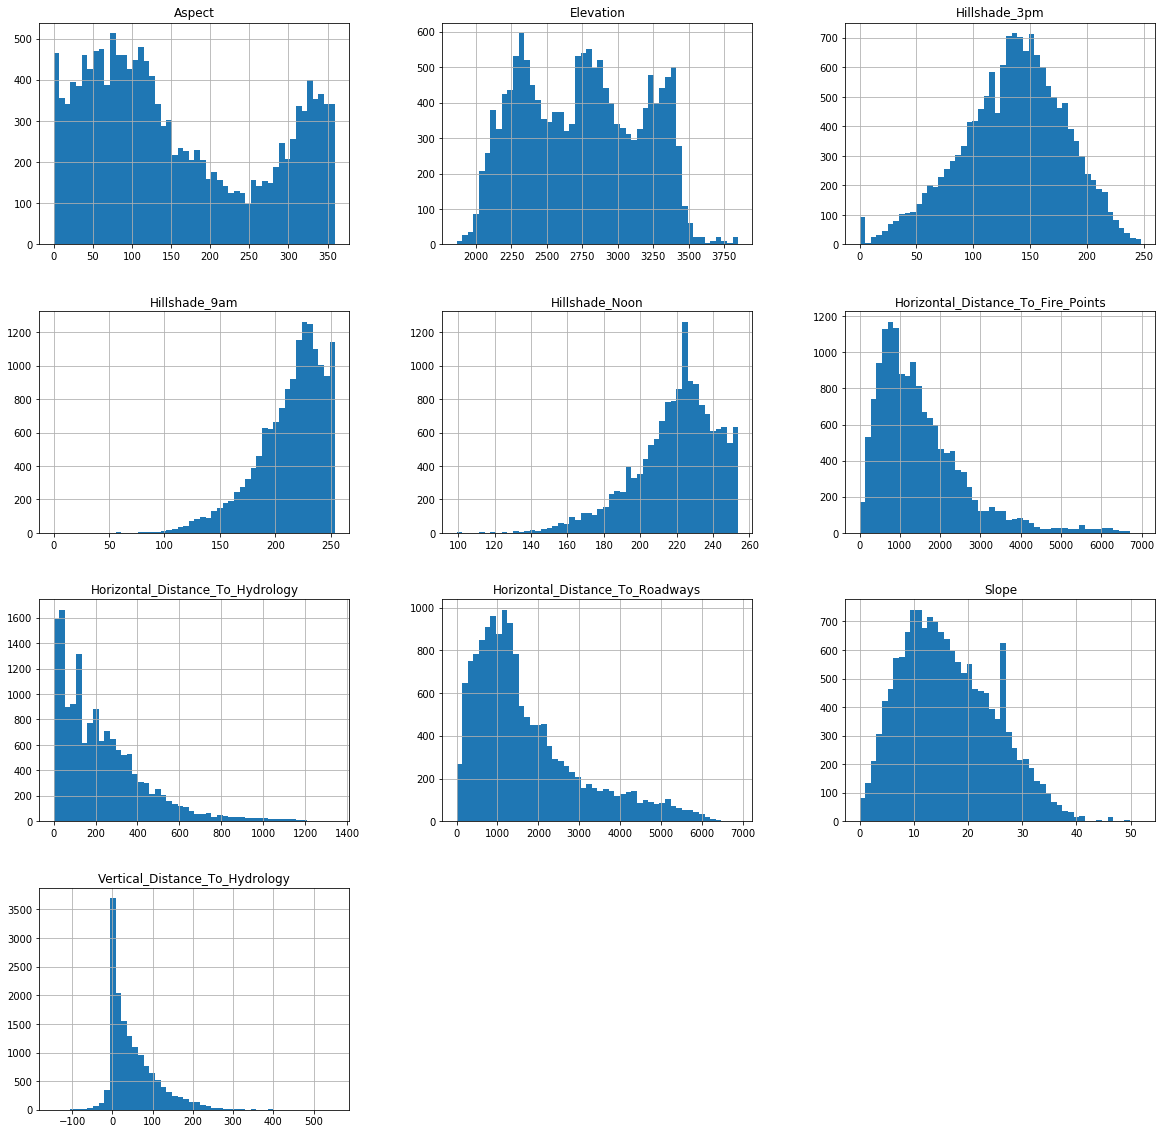

In [21]:
train.iloc[:,:10].hist(figsize=(20,20),bins=50)

### Explore binary features

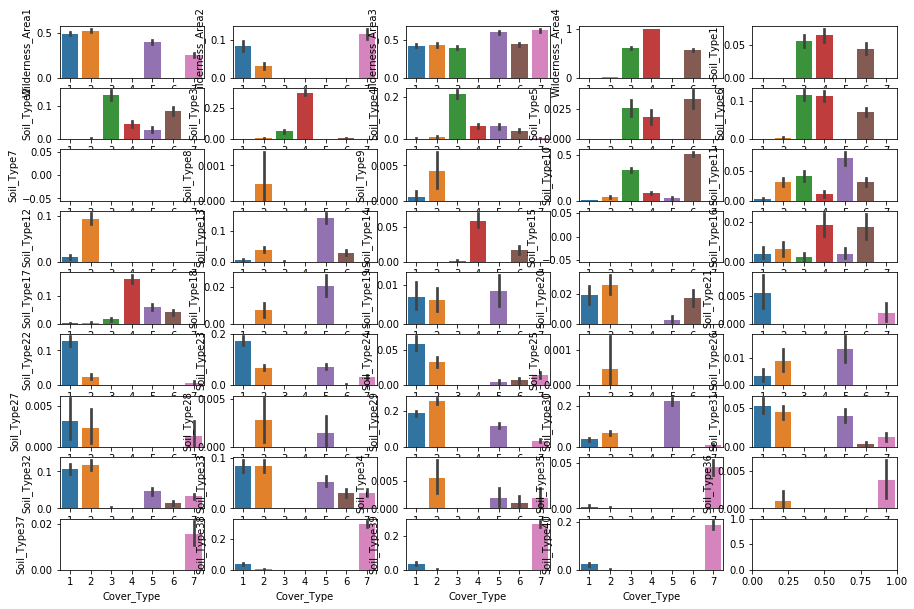

In [12]:
binary_columns=train.columns[10:54]
fig,axis=plt.subplots(figsize=(15,10),nrows=9,ncols=5)
for n,i in enumerate(binary_columns):
    sns.barplot(x="Cover_Type", y=i, data=train,ax=axis[n//5,n%5])

    

## Exploratory Visualization
### Locations of forest cover types -- the wilderness areas in which they occur

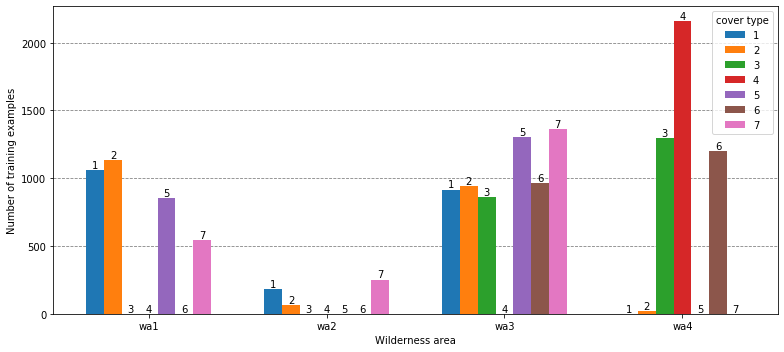

In [15]:
cover_types = [1, 2, 3, 4, 5, 6, 7]
n_features = 4
plot_these = train.columns[10:10+n_features]
bar_width = 0.10
opacity = 0.4
error_config = {'ecolor': '0.3'}
fig     = plt.figure(figsize=(11, 5))
ax      = plt.gca()
ax.grid(axis='y', linestyle='dashed', color='gray')
ax.set_axisbelow(True)

index = np.arange(n_features)

all_bars = list()
for c in cover_types:
    bars = list()
    for i, feature_name in enumerate( plot_these ):
        val = np.sum(train[train['Cover_Type'] == c][feature_name])
        bars.append(val)
    all_bars.append(bars)

for i,cover_type in enumerate(cover_types):
    rects = ax.bar(index+i*bar_width, all_bars[i], bar_width,
                 error_kw=error_config,
                 label=cover_type, zorder=200)
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height, cover_type, 
                ha='center', va='bottom', zorder=200)

plt.xlabel('Wilderness area')
plt.ylabel('Number of training examples')
plt.xticks(index+(bar_width*len(cover_types))/2-bar_width/2, ('wa1', 'wa2', 'wa3', 'wa4'))
plt.legend(title='cover type')

plt.tight_layout()
plt.show()

## Correlated Features

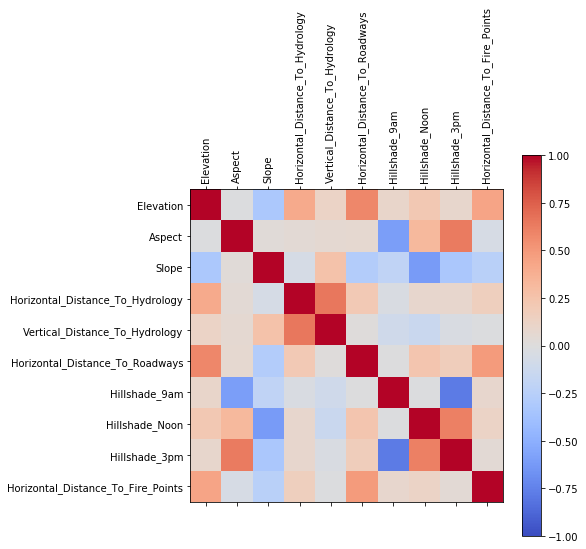

In [19]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore Wilderness_Area and Soil_Type 

corr = train.iloc[:,:10].corr()
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, train.iloc[:,:10].shape[1],1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train.iloc[:,:10].columns)
ax.set_yticklabels(train.iloc[:,:10].columns)
plt.show()

In [20]:
corr_matrix=pd.DataFrame(corr.abs().unstack().sort_values(ascending=False)[9:30])
corr_matrix.reset_index(inplace=True)
corr_matrix.rename(columns={"level_0":"first","level_1":"second",0:"corr_coef"},inplace=True)
corr_matrix.drop_duplicates(subset=['corr_coef'], keep='first',inplace=True)

In [12]:
corr_matrix

,first,second,corr_coef
0,Hillshade_3pm,Hillshade_9am,0.779965
2,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology,0.652142
4,Aspect,Hillshade_3pm,0.635022
6,Hillshade_3pm,Hillshade_Noon,0.614526
8,Slope,Hillshade_Noon,0.612613
10,Aspect,Hillshade_9am,0.593997
12,Elevation,Horizontal_Distance_To_Roadways,0.578659
14,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,0.486386
16,Elevation,Horizontal_Distance_To_Fire_Points,0.443563
18,Elevation,Horizontal_Distance_To_Hydrology,0.412712


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


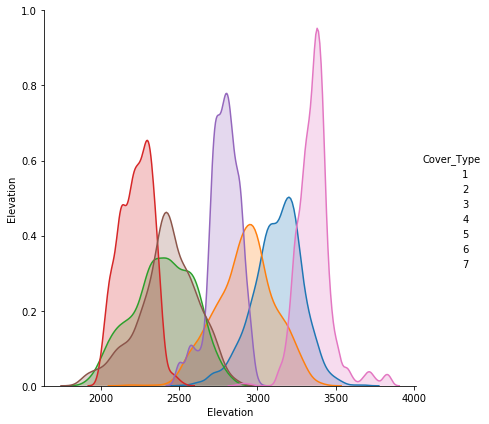

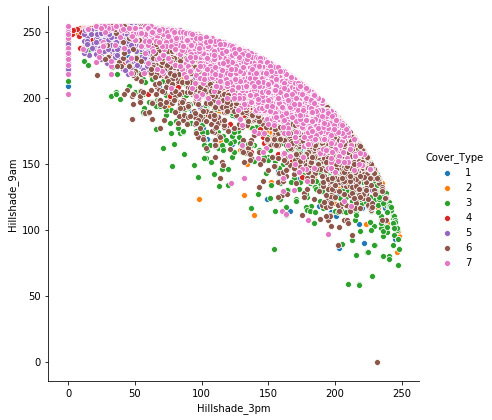

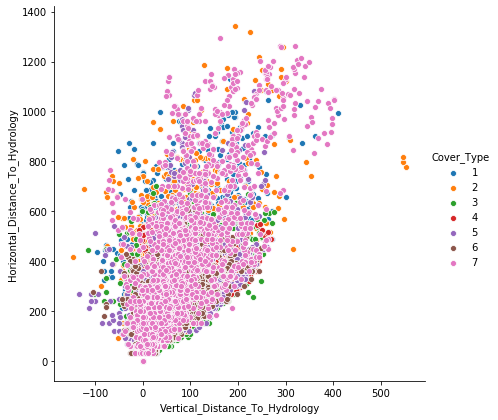

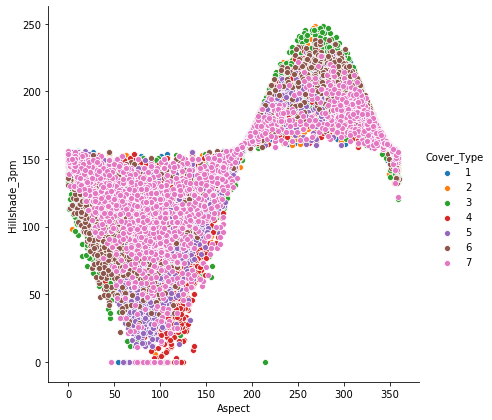

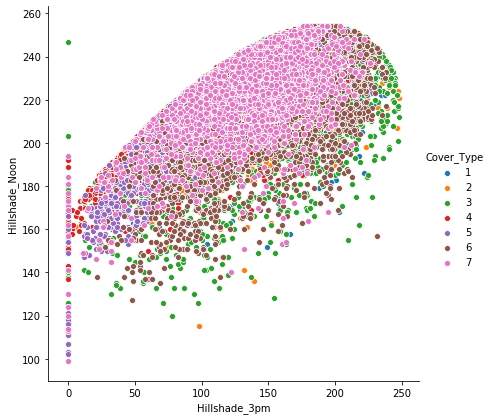

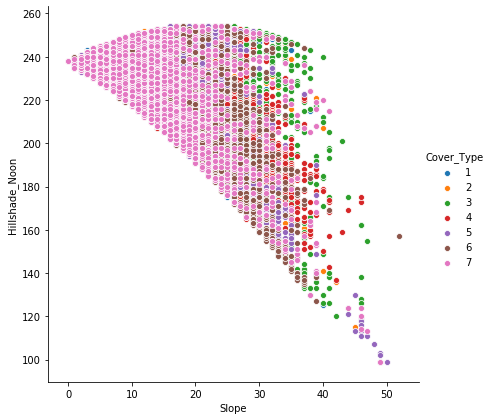

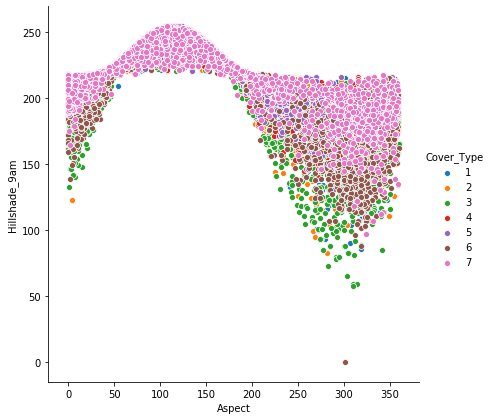

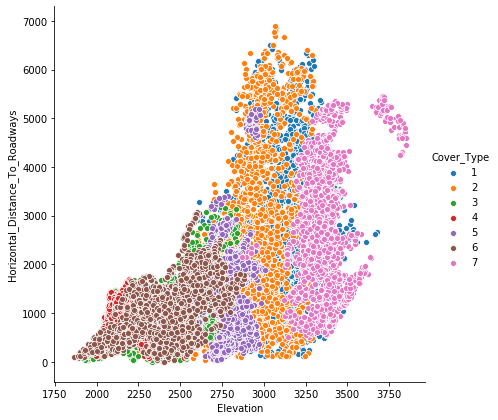

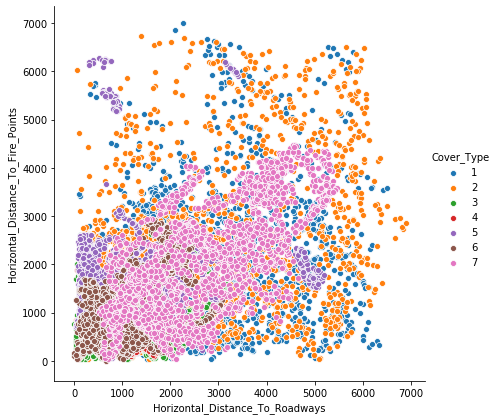

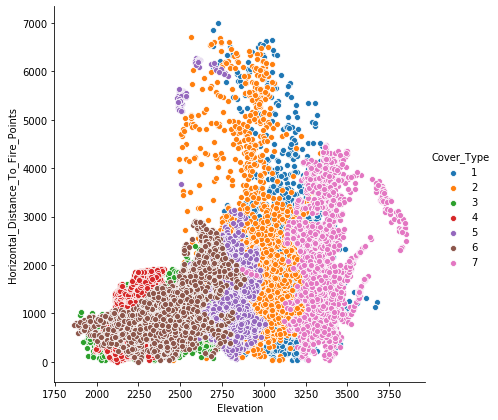

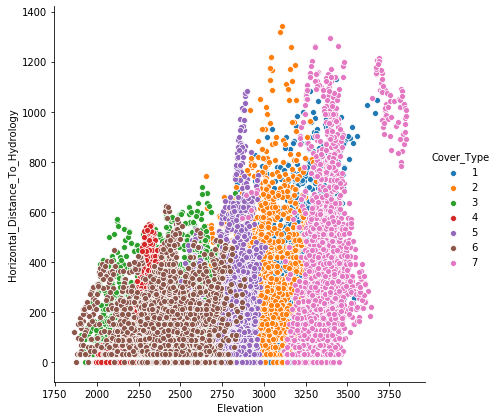

In [21]:
# Strong correlation is observed between the following pairs
for index,items in corr_matrix.iterrows():
    sns.pairplot(train, hue="Cover_Type", size=6, x_vars=items["first"],y_vars=items["second"] )
    plt.show()
   

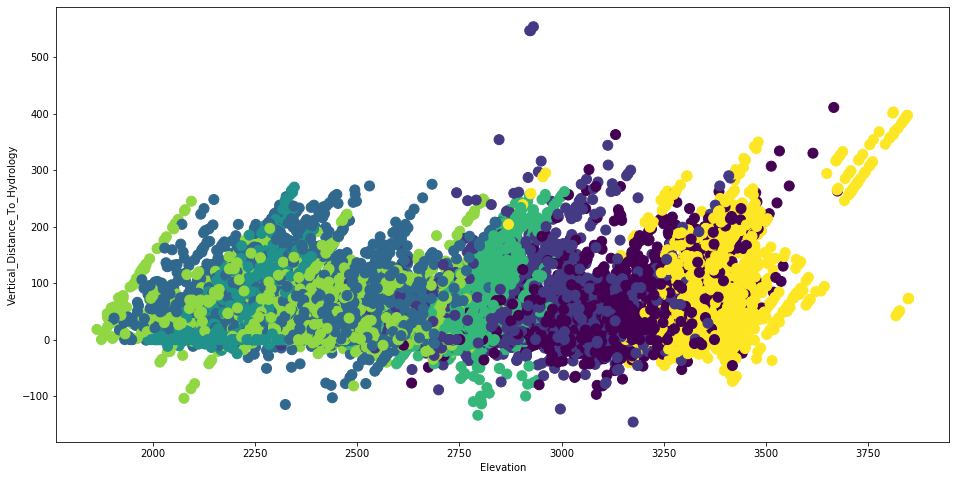

In [23]:
def plot_corr(c1,c2,hue):
    fig = plt.figure(figsize=(16,8))
    hue = np.array(list(hue.values))
    plt.scatter(c1, c2, c=hue, s=100)
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)
plot_corr(train.Elevation, train.Vertical_Distance_To_Hydrology,train.Cover_Type)

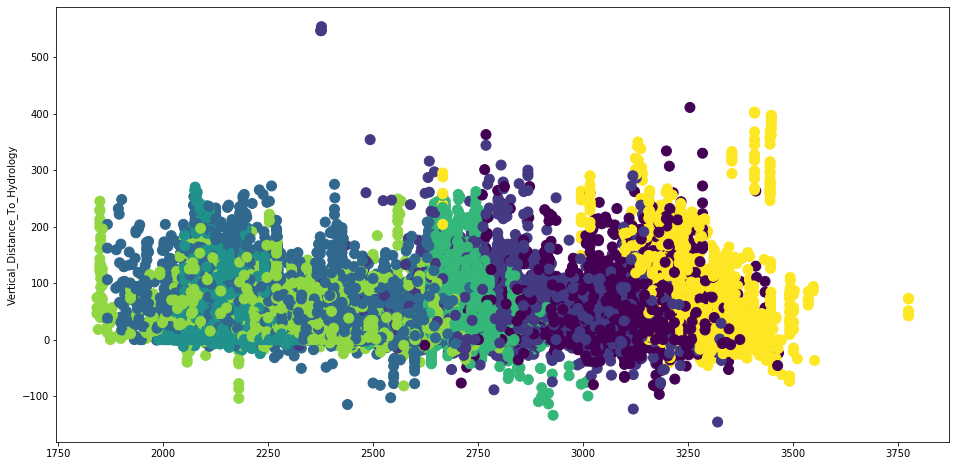

In [24]:
plot_corr(train.Elevation-train.Vertical_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology,train.Cover_Type)


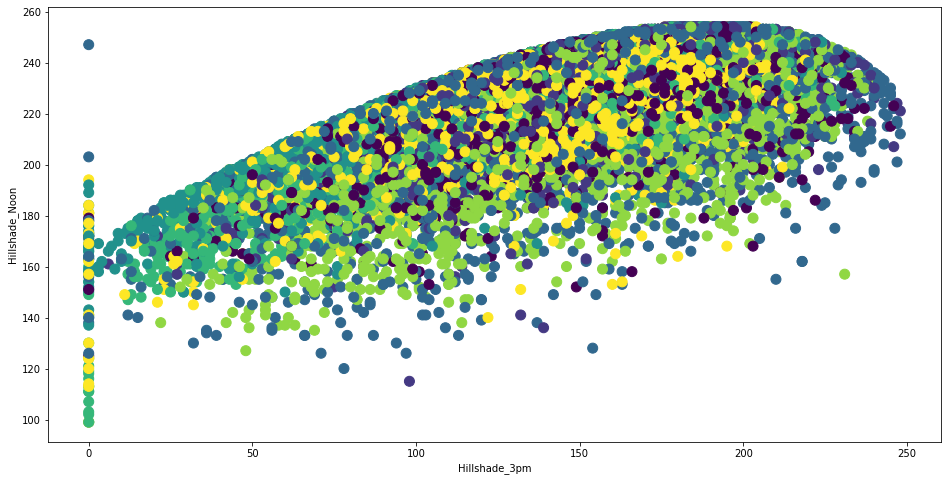

In [25]:
plot_corr(train.Hillshade_3pm, train.Hillshade_Noon,train.Cover_Type)

#### The relationship between hillshade 3 PM and 9 AM, they've clear negative correlation while 3 PM and noon have positive correlation. But  hillshade 3 PM has values  that are zeroes. Let's plot the relationship between hillshade at 9 AM and Noon where 3 PM hillshade is 0.

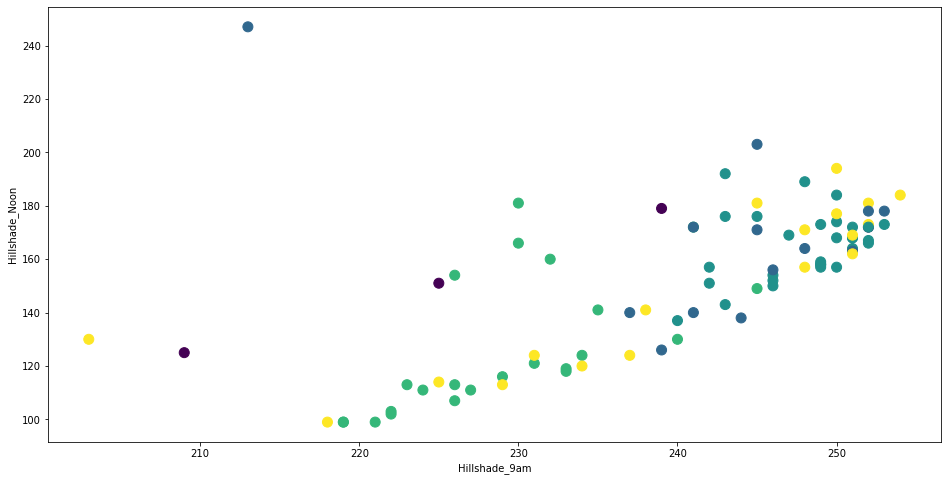

In [26]:
plot_corr(train[train.Hillshade_3pm==0].Hillshade_9am,train[train.Hillshade_3pm==0].Hillshade_Noon,train[train.Hillshade_3pm==0].Cover_Type)

### Gradient Boosted Regression Trees

In [22]:
train_copy=train.copy()
cols=train_copy.columns.tolist()
cols=cols[:8]+cols[9:]+[cols[8]]
train_copy=train_copy[cols] 

In [23]:
train_copy.drop(columns=["Cover_Type"],inplace=True)

In [24]:
X,y,X_missing,y_missing=train_copy[train_copy["Hillshade_3pm"]!=0].values[:,:-1],\
                        train_copy[train_copy["Hillshade_3pm"]!=0].values[:,-1:].ravel(),\
                        train_copy[train_copy["Hillshade_3pm"]==0].values[:,:-1],\
                        train_copy[train_copy["Hillshade_3pm"]==0].values[:,-1:].ravel()

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
clf=GradientBoostingRegressor(n_estimators=1000)
clf.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
print('Training R-squared value: %.2f'%clf.score(X_train,y_train))
print('Test R-squared value: %.2f'%clf.score(X_test,y_test))

Training R-squared value: 1.00
Test R-squared value: 1.00


In [28]:
train_copy.Hillshade_3pm.loc[train_copy.Hillshade_3pm==0]=clf.predict(X_missing)

In [29]:
train.Hillshade_3pm=train_copy.Hillshade_3pm

In [30]:
del train_copy

## Feature Engineering

In [31]:
train['Distanse_to_Hydrolody'] = (train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)**0.5

In [32]:
#Elevation adjusted by Horizontal distance to Hyrdrology 
train['EHDtH'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2
#Elevation adjusted by Horizontal distance to Roadways 
train['EHDtR'] = train.Elevation-0.05*train.Horizontal_Distance_To_Roadways
#Elevation adjusted by Vertical distance to Hyrdrology 
train['EVDtH'] = train.Elevation-train.Vertical_Distance_To_Hydrology

In [33]:
def r(x):
    if x+180>360:
        return x-180
    else:
        return x+180

train['Aspect2'] = train.Aspect.map(r)

In [34]:
train["Highwater"]=train["Vertical_Distance_To_Hydrology"]<0

In [35]:
train['Hydro_Fire_1'] = train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points']

train['Hydro_Fire_2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])

train['Hydro_Road_1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])

train['Hydro_Road_2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])

train['Fire_Road_1'] = abs(train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])

train['Fire_Road_2'] = abs(train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

## Model Fitting

### Train Test Split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(train.drop(columns=["Cover_Type"]),train.Cover_Type,test_size=0.33,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(10130, 66) (10130,) (4990, 66) (4990,)



### Cross Validation Generator

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB 
from sklearn.datasets import load_digits 
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure() 
    plt.title(title) 
    if ylim is not None: plt.ylim(*ylim) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 

    return plt 

### Random Forest Classifier

In [38]:
estimator=RandomForestClassifier()
param={"n_estimators":[1000],#[500,1000,5000]
      "max_depth":[16]#[10,12,14]
      }
n_jobs=2

In [39]:
def Cross_validate(estimator,param_grid,n_jobs):
    cv=ShuffleSplit(n_splits=5,random_state=0, test_size=0.25)
    model=GridSearchCV(cv=cv,estimator=estimator,param_grid=param_grid,n_jobs=n_jobs,scoring="accuracy")
    model.fit(X_train,y_train)
    print("best_estimator:%s"%model.best_estimator_)
    return cv,model.best_estimator_   

In [40]:
%%time
cv,best_estimator=Cross_validate(estimator,param,n_jobs)

best_estimator:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Wall time: 3min 11s


In [49]:
print("best estimtor:%d"%best_estimator.n_estimators)
print("max depth:%d"%best_estimator.max_depth)

best estimtor:1000
max depth:16


In [50]:
print("scores:%f"%best_estimator.score(X_train,y_train))

scores:0.992991


In [51]:
print("scores:%f"%best_estimator.score(X_test,y_test))

scores:0.870541


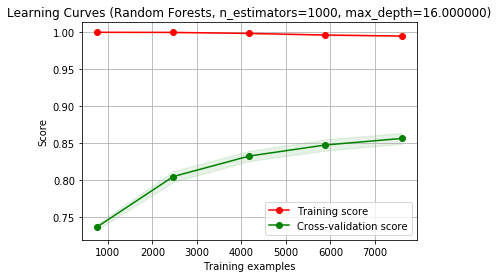

In [52]:
title = "Learning Curves (Random Forests, n_estimators=%d, max_depth=%.6f)" %(best_estimator.n_estimators, \
                                                                              best_estimator.max_depth) 
plot_learning_curve(best_estimator, title, X_train, y_train, cv=cv, n_jobs=2) 
plt.show() 

#### Change some parametres to remove overfitting(Max_Features,min_samples_leaf)

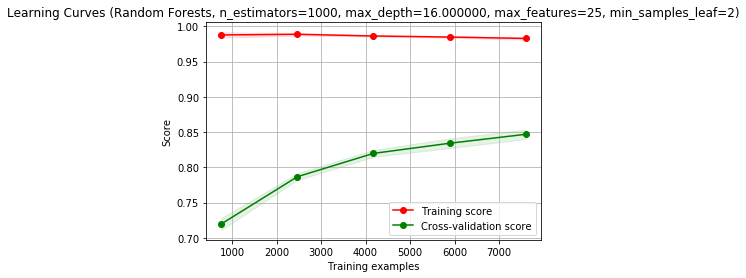

In [53]:
best_estimator.set_params(max_features=25, min_samples_leaf=2) 

title = "Learning Curves (Random Forests, n_estimators=%d, max_depth=%.6f, max_features=%d, min_samples_leaf=%d)"%(best_estimator.n_estimators, best_estimator.max_depth, best_estimator.max_features,best_estimator.min_samples_leaf) 

plot_learning_curve(best_estimator, title, X_train, y_train, cv=cv, n_jobs=2) 
plt.show() 

We see that our aсcuracy become worst lets return our parametres to default

In [54]:
best_estimator.set_params(max_features='auto', min_samples_leaf=1) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### ExtraTrees Classifier

In [98]:
ext = ExtraTreesClassifier(oob_score=True, bootstrap=True,random_state=0)
param={
    "n_estimators": [1000],#[1000, 750, 500] 
    "criterion": [ 'entropy'], #'gini'
    "max_depth": [500],#[10, 100, 1000] 
    "max_features": ['log2'], #'auto'
    "max_leaf_nodes": [1000],#[100, 500, 1000, 2000] 
      }
n_jobs=2

In [ ]:
%%time
cv,ext_estimator=Cross_validate(estimator,param,n_jobs)

In [71]:
print("scores train:%f"%ext_estimator.score(X_train,y_train))

scores train:1.000000


In [72]:
print("scores test:%f"%ext_estimator.score(X_test,y_test))

scores test:0.880561


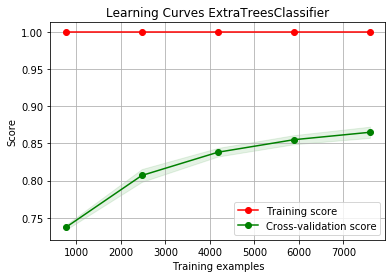

In [73]:
title = "Learning Curves ExtraTreesClassifier"
plot_learning_curve(c, title, X_train, y_train, cv=cv, n_jobs=2) 
plt.show() 

In [41]:
#Always call fit on the estimator before invoking this method. 
def importances(estimator, col_array, title):
    importances = estimator.feature_importances_ 
    indices = np.argsort(importances)[::-1] 
    print("%s Top 20 Important Features\n" %title) 
    for f in range(20):
        print("%d. %s (%f)" % (f + 1, col_array.columns[indices[f]], importances[indices[f]])) 
    indices=indices[:10] 
    plt.figure() 
    plt.title(title+" Top 10 Feature importances") 
    plt.bar(range(10), importances[indices], color="gr", align="center") 
    plt.xticks(range(10), col_array.columns[indices], fontsize=14, rotation=90) 
    plt.xlim([-1, 10]) 
    plt.show() 

forest Top 20 Important Features

1. Distanse_to_Hydrolody (0.111338)
2. EHDtR (0.105451)
3. Elevation (0.099138)
4. EHDtH (0.088364)
5. Hydro_Road_2 (0.040856)
6. Horizontal_Distance_To_Roadways (0.033988)
7. Hydro_Road_1 (0.033555)
8. Hydro_Fire_2 (0.032261)
9. Cover_Type (0.030848)
10. Highwater (0.028219)
11. Horizontal_Distance_To_Hydrology (0.027682)
12. Hillshade_9am (0.027183)
13. EVDtH (0.026854)
14. Horizontal_Distance_To_Fire_Points (0.026468)
15. Hydro_Fire_1 (0.025601)
16. Fire_Road_1 (0.025496)
17. Vertical_Distance_To_Hydrology (0.024292)
18. Aspect (0.023354)
19. Hillshade_Noon (0.022112)
20. Hillshade_3pm (0.020445)


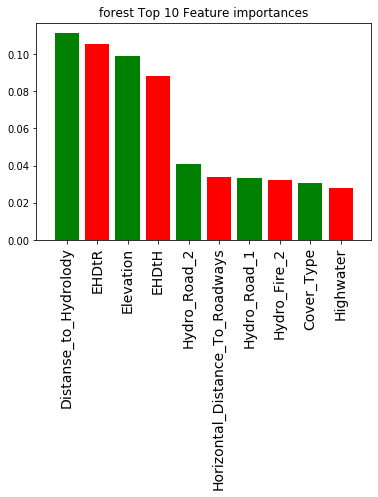

In [42]:
importances(best_estimator,train,"forest")

In [44]:
clf=GradientBoostingClassifier(n_estimators=800,max_depth=10,subsample=0.5,learning_rate = 0.02 ,max_features="log2")

In [45]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=10,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [47]:
clf.score(X_train,y_train)

1.0

In [48]:
clf.score(X_test,y_test)

0.8881763527054108

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

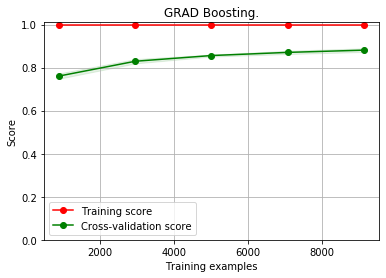

In [50]:
kfold = ShuffleSplit(n_splits = 5)
plot_learning_curve(clf, 'GRAD Boosting.', X_train, np.ravel(y_train), ylim=(0, 1.01), cv=kfold, n_jobs=2)

GradientBoostingClassifier give us the best result